<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap13/13_1_Graph_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 13.1: Graph representation**

This notebook investigates representing graphs with matrices as illustrated in figure 13.4 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Routine to draw graph structure
def draw_graph_structure(adjacency_matrix):
    G = nx.Graph()
    n_node = adjacency_matrix.shape[0]
    for i in range(n_node):
        for j in range(i):
            if adjacency_matrix[i, j]:
                G.add_edge(i, j)

    nx.draw(G, nx.spring_layout(G, seed=0), with_labels=True)
    plt.show()

[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]


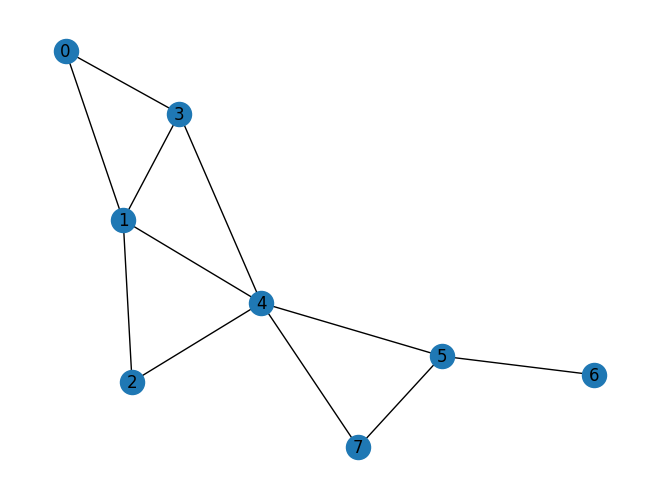

In [3]:
# Define a graph
# Note that the nodes are labelled from 0 rather than 1 as in the book
A = np.array(
    [
        [0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
    ]
)
print(A)
draw_graph_structure(A)

In [4]:
# TODO -- find algorithmically how many walks of length three are between nodes 3 and 7
# Replace this line
walks_3_7 = np.linalg.matrix_power(A, 3)[3, 7]
print(f"Number of walks between nodes three and seven = {walks_3_7}")

Number of walks between nodes three and seven = 2


In [5]:
# TODO -- find algorithmically what the minimum path distance between nodes 0 and 6 is
# (i.e. what is the first walk length with non-zero count between 0 and 6)
# Replace this line
from collections import deque

def bfs_shortest_path(A, target):
    n = A.shape[0]
    distances = [-1] * n  # 初始化距离为 -1
    distances[target] = 0  # 起点距离为 0
    queue = deque([target])  # 初始化队列
    
    while queue:
        node = queue.popleft()
        for neighbor in range(n):
            if A[node][neighbor] == 1 and distances[neighbor] == -1:  # 邻居未访问
                distances[neighbor] = distances[node] + 1
                queue.append(neighbor)
    
    return np.array(distances)


print("Minimum distance =", bfs_shortest_path(A, 0)[6])


# What is the worst case complexity of your method?

Minimum distance = 4


In [6]:
# Now let's represent node 0 as a vector
x = np.array([[1], [0], [0], [0], [0], [0], [0], [0]])
print(x)

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [8]:
# TODO: Find algorithmically how many paths of length 3 are there between node 0 and every other node
# Replace this line
A_cubed = np.linalg.matrix_power(A, 3)

print(np.dot(A_cubed, x))

[[2]
 [6]
 [3]
 [5]
 [3]
 [2]
 [0]
 [2]]
